In [1]:
import pandas as pd 
import numpy as np
import seaborn as sns 
import matplotlib
import sklearn
import matplotlib.pyplot as plt 
from sklearn.preprocessing import StandardScaler
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline
print("numpy==", np.__version__)
print("pandas==", pd.__version__)
print("seaborn==", sns.__version__)
print("matplotlib==", matplotlib.__version__)
print("sklearn==", sklearn.__version__)

numpy== 1.26.4
pandas== 2.2.2
seaborn== 0.13.2
matplotlib== 3.8.4
sklearn== 1.4.2


In [2]:
df = pd.read_csv('D:/pratice/Machine learning/Loan_default1.csv')
df.head()


,LoanID,Gender,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,Male,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,Female,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,Male,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,Male,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,Male,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df.columns

Index(['LoanID', 'Gender', 'Age', 'Income', 'LoanAmount', 'CreditScore',
       'MonthsEmployed', 'NumCreditLines', 'InterestRate', 'LoanTerm',
       'DTIRatio', 'Education', 'EmploymentType', 'MaritalStatus',
       'HasMortgage', 'HasDependents', 'LoanPurpose', 'HasCoSigner',
       'Default'],
      dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 19 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Gender          255347 non-null  object 
 2   Age             255347 non-null  int64  
 3   Income          255347 non-null  int64  
 4   LoanAmount      255347 non-null  int64  
 5   CreditScore     255347 non-null  int64  
 6   MonthsEmployed  255347 non-null  int64  
 7   NumCreditLines  255347 non-null  int64  
 8   InterestRate    255347 non-null  float64
 9   LoanTerm        255347 non-null  int64  
 10  DTIRatio        255347 non-null  float64
 11  Education       255347 non-null  object 
 12  EmploymentType  255347 non-null  object 
 13  MaritalStatus   255347 non-null  object 
 14  HasMortgage     255347 non-null  object 
 15  HasDependents   255347 non-null  object 
 16  LoanPurpose     255347 non-null  object 
 17  HasCoSigne

In [5]:
df.isnull().sum()

LoanID            0
Gender            0
Age               0
Income            0
LoanAmount        0
CreditScore       0
MonthsEmployed    0
NumCreditLines    0
InterestRate      0
LoanTerm          0
DTIRatio          0
Education         0
EmploymentType    0
MaritalStatus     0
HasMortgage       0
HasDependents     0
LoanPurpose       0
HasCoSigner       0
Default           0
dtype: int64

<Axes: >

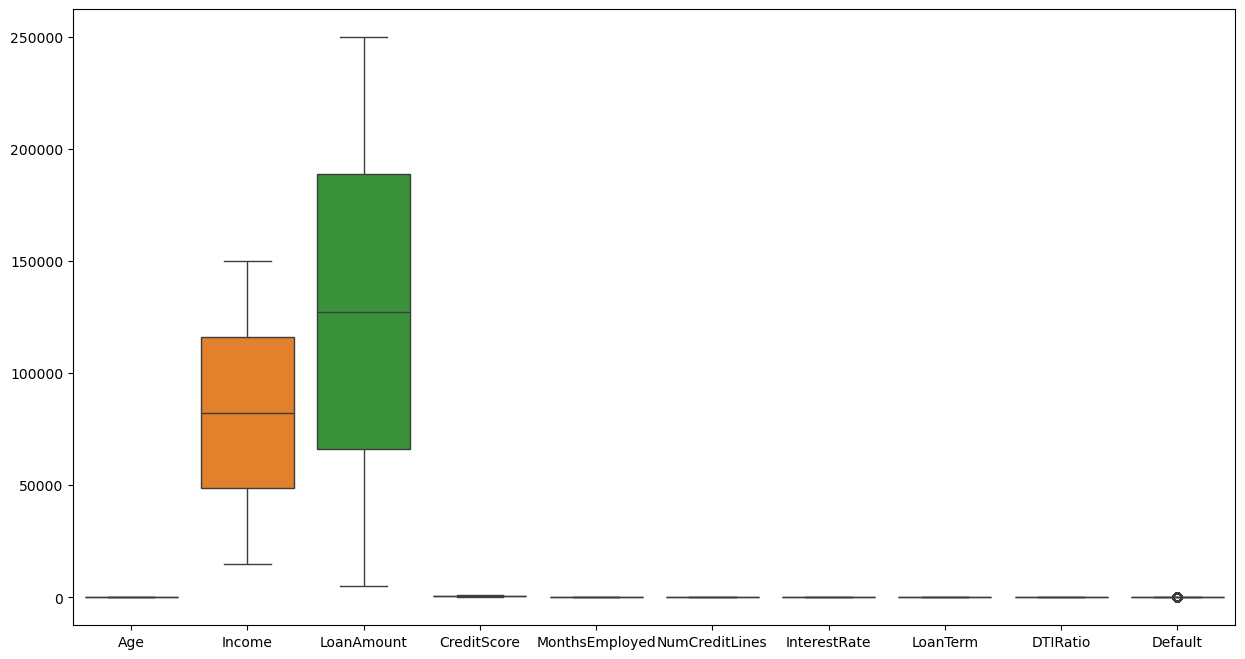

In [6]:
plt.figure(figsize =(15,8))
sns.boxplot(data = df)


gender difference
Gender
Male      187255
Female     68092
Name: count, dtype: int64


<Axes: xlabel='Gender', ylabel='count'>

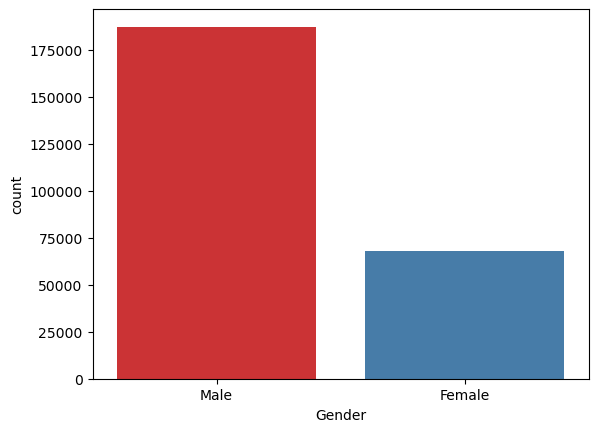

In [7]:
print('gender difference')
print(df['Gender'].value_counts())
sns.countplot(x='Gender' ,data= df, palette='Set1')

Education difference
Education
Bachelor's     64366
High School    63903
Master's       63541
PhD            63537
Name: count, dtype: int64


<Axes: xlabel='Education', ylabel='count'>

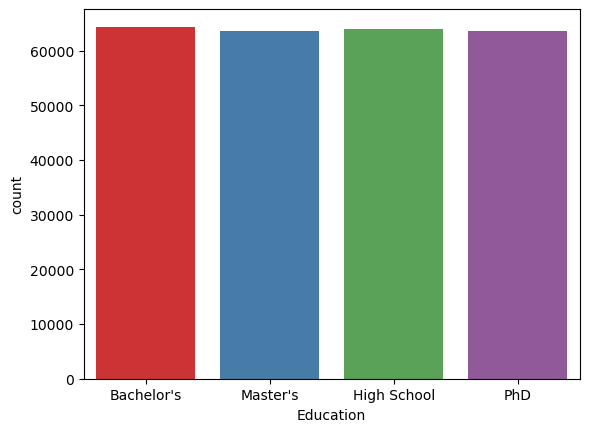

In [8]:
print('Education difference')
print(df['Education'].value_counts())
sns.countplot(x='Education' ,data= df, palette='Set1')

EmploymentType difference
EmploymentType
Part-time        64161
Unemployed       63824
Self-employed    63706
Full-time        63656
Name: count, dtype: int64


<Axes: xlabel='EmploymentType', ylabel='count'>

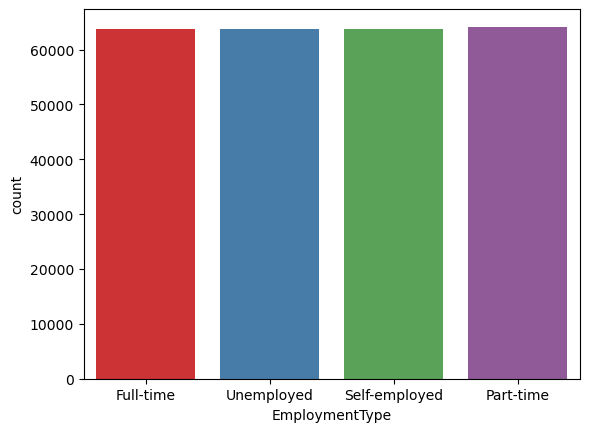

In [9]:
print('EmploymentType difference')
print(df['EmploymentType'].value_counts())
sns.countplot(x='EmploymentType' ,data= df, palette='Set1')

In [10]:
cols = ['LoanID']
df =df.drop(columns = cols, axis = 1)
df.head()

,Gender,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,Male,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,Female,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,Male,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,Male,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,Male,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [11]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [12]:
label_encoder = LabelEncoder()
df['Gender_encoded'] = label_encoder.fit_transform(df['Gender'])
print(df[['Gender', 'Gender_encoded']])

        Gender  Gender_encoded
0         Male               1
1       Female               0
2         Male               1
3         Male               1
4         Male               1
...        ...             ...
255342  Female               0
255343    Male               1
255344    Male               1
255345    Male               1
255346    Male               1

[255347 rows x 2 columns]


In [13]:
label_encoder = LabelEncoder()
df['HasMortgage_encoded'] = label_encoder.fit_transform(df['HasMortgage'])
print(df[['HasMortgage', 'HasMortgage_encoded']])

       HasMortgage  HasMortgage_encoded
0              Yes                    1
1               No                    0
2              Yes                    1
3               No                    0
4               No                    0
...            ...                  ...
255342          No                    0
255343          No                    0
255344         Yes                    1
255345         Yes                    1
255346         Yes                    1

[255347 rows x 2 columns]


In [14]:
label_encoder = LabelEncoder()
df['HasDependents_encoded'] = label_encoder.fit_transform(df['HasDependents'])
print(df[['HasDependents', 'HasDependents_encoded']])

       HasDependents  HasDependents_encoded
0                Yes                      1
1                 No                      0
2                Yes                      1
3                 No                      0
4                Yes                      1
...              ...                    ...
255342            No                      0
255343            No                      0
255344           Yes                      1
255345           Yes                      1
255346            No                      0

[255347 rows x 2 columns]


In [15]:
label_encoder = LabelEncoder()
df['HasCoSigner_encoded'] = label_encoder.fit_transform(df['HasCoSigner'])
print(df[['HasCoSigner', 'HasCoSigner_encoded']])

       HasCoSigner  HasCoSigner_encoded
0              Yes                    1
1              Yes                    1
2               No                    0
3               No                    0
4               No                    0
...            ...                  ...
255342          No                    0
255343          No                    0
255344         Yes                    1
255345          No                    0
255346         Yes                    1

[255347 rows x 2 columns]


In [16]:
cols = ['HasMortgage','Gender','HasCoSigner','HasDependents']
df =df.drop(columns = cols, axis = 1)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,LoanPurpose,Default,Gender_encoded,HasMortgage_encoded,HasDependents_encoded,HasCoSigner_encoded
0,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Other,0,1,1,1,1
1,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,Other,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Auto,1,1,1,1,0
3,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,Business,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,Auto,0,1,0,1,0


In [17]:
df = pd.get_dummies(df, columns=['MaritalStatus'])
print("DataFrame after One-Hot Encoding:\n", df)

DataFrame after One-Hot Encoding:
         Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0        56   85994       50587          520              80               4   
1        69   50432      124440          458              15               1   
2        46   84208      129188          451              26               3   
3        32   31713       44799          743               0               3   
4        60   20437        9139          633               8               4   
...     ...     ...         ...          ...             ...             ...   
255342   19   37979      210682          541             109               4   
255343   32   51953      189899          511              14               2   
255344   56   84820      208294          597              70               3   
255345   42   85109       60575          809              40               1   
255346   62   22418       18481          636             113               2   

    

In [18]:
df = pd.get_dummies(df, columns=['Education'])
print("DataFrame after One-Hot Encoding:\n", df)

DataFrame after One-Hot Encoding:
         Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0        56   85994       50587          520              80               4   
1        69   50432      124440          458              15               1   
2        46   84208      129188          451              26               3   
3        32   31713       44799          743               0               3   
4        60   20437        9139          633               8               4   
...     ...     ...         ...          ...             ...             ...   
255342   19   37979      210682          541             109               4   
255343   32   51953      189899          511              14               2   
255344   56   84820      208294          597              70               3   
255345   42   85109       60575          809              40               1   
255346   62   22418       18481          636             113               2   

    

In [19]:
df= pd.get_dummies(df, columns=['EmploymentType'])
print("DataFrame after One-Hot Encoding:\n", df)

DataFrame after One-Hot Encoding:
         Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0        56   85994       50587          520              80               4   
1        69   50432      124440          458              15               1   
2        46   84208      129188          451              26               3   
3        32   31713       44799          743               0               3   
4        60   20437        9139          633               8               4   
...     ...     ...         ...          ...             ...             ...   
255342   19   37979      210682          541             109               4   
255343   32   51953      189899          511              14               2   
255344   56   84820      208294          597              70               3   
255345   42   85109       60575          809              40               1   
255346   62   22418       18481          636             113               2   

    

In [20]:
df = pd.get_dummies(df, columns=['LoanPurpose'])
print("DataFrame after One-Hot Encoding:\n", df)

DataFrame after One-Hot Encoding:
         Age  Income  LoanAmount  CreditScore  MonthsEmployed  NumCreditLines  \
0        56   85994       50587          520              80               4   
1        69   50432      124440          458              15               1   
2        46   84208      129188          451              26               3   
3        32   31713       44799          743               0               3   
4        60   20437        9139          633               8               4   
...     ...     ...         ...          ...             ...             ...   
255342   19   37979      210682          541             109               4   
255343   32   51953      189899          511              14               2   
255344   56   84820      208294          597              70               3   
255345   42   85109       60575          809              40               1   
255346   62   22418       18481          636             113               2   

    

In [21]:
label_encoder = LabelEncoder()
df['MaritalStatus_Divorced_encoded'] = label_encoder.fit_transform(df['MaritalStatus_Divorced'])
print(df[['MaritalStatus_Divorced', 'MaritalStatus_Divorced_encoded']])

        MaritalStatus_Divorced  MaritalStatus_Divorced_encoded
0                         True                               1
1                        False                               0
2                         True                               1
3                        False                               0
4                         True                               1
...                        ...                             ...
255342                   False                               0
255343                    True                               1
255344                   False                               0
255345                   False                               0
255346                    True                               1

[255347 rows x 2 columns]


In [22]:
label_encoder = LabelEncoder()
df['MaritalStatus_Married_encoded'] = label_encoder.fit_transform(df['MaritalStatus_Married'])
print(df[['MaritalStatus_Married', 'MaritalStatus_Married_encoded']])

        MaritalStatus_Married  MaritalStatus_Married_encoded
0                       False                              0
1                        True                              1
2                       False                              0
3                        True                              1
4                       False                              0
...                       ...                            ...
255342                   True                              1
255343                  False                              0
255344                   True                              1
255345                  False                              0
255346                  False                              0

[255347 rows x 2 columns]


In [23]:
label_encoder = LabelEncoder()
df['MaritalStatus_Single_encoded'] = label_encoder.fit_transform(df['MaritalStatus_Single'])
print(df[['MaritalStatus_Single', 'MaritalStatus_Single_encoded']])

        MaritalStatus_Single  MaritalStatus_Single_encoded
0                      False                             0
1                      False                             0
2                      False                             0
3                      False                             0
4                      False                             0
...                      ...                           ...
255342                 False                             0
255343                 False                             0
255344                 False                             0
255345                  True                             1
255346                 False                             0

[255347 rows x 2 columns]


In [24]:
label_encoder = LabelEncoder()
df["Education_Bachelor's_encoded"] = label_encoder.fit_transform(df["Education_Bachelor's"])
print(df[["Education_Bachelor's", "Education_Bachelor's_encoded"]])

        Education_Bachelor's  Education_Bachelor's_encoded
0                       True                             1
1                      False                             0
2                      False                             0
3                      False                             0
4                       True                             1
...                      ...                           ...
255342                  True                             1
255343                 False                             0
255344                 False                             0
255345                 False                             0
255346                  True                             1

[255347 rows x 2 columns]


In [25]:
label_encoder = LabelEncoder()
df["Education_High School_encoded"] = label_encoder.fit_transform(df["Education_High School"])
print(df[["Education_High School", "Education_High School_encoded"]])

        Education_High School  Education_High School_encoded
0                       False                              0
1                       False                              0
2                       False                              0
3                        True                              1
4                       False                              0
...                       ...                            ...
255342                  False                              0
255343                   True                              1
255344                   True                              1
255345                   True                              1
255346                  False                              0

[255347 rows x 2 columns]


In [26]:
label_encoder = LabelEncoder()
df["Education_Master's_encoded"] = label_encoder.fit_transform(df["Education_Master's"])
print(df[["Education_Master's", "Education_Master's_encoded"]])

        Education_Master's  Education_Master's_encoded
0                    False                           0
1                     True                           1
2                     True                           1
3                    False                           0
4                    False                           0
...                    ...                         ...
255342               False                           0
255343               False                           0
255344               False                           0
255345               False                           0
255346               False                           0

[255347 rows x 2 columns]


In [27]:
label_encoder = LabelEncoder()
df["Education_PhD_encoded"] = label_encoder.fit_transform(df["Education_PhD"])
print(df[["Education_PhD", "Education_PhD_encoded"]])

        Education_PhD  Education_PhD_encoded
0               False                      0
1               False                      0
2               False                      0
3               False                      0
4               False                      0
...               ...                    ...
255342          False                      0
255343          False                      0
255344          False                      0
255345          False                      0
255346          False                      0

[255347 rows x 2 columns]


In [28]:
label_encoder = LabelEncoder()
df["EmploymentType_Full-time_encoded"] = label_encoder.fit_transform(df["EmploymentType_Full-time"])
print(df[["EmploymentType_Full-time", "EmploymentType_Full-time_encoded"]])

        EmploymentType_Full-time  EmploymentType_Full-time_encoded
0                           True                                 1
1                           True                                 1
2                          False                                 0
3                           True                                 1
4                          False                                 0
...                          ...                               ...
255342                      True                                 1
255343                     False                                 0
255344                     False                                 0
255345                     False                                 0
255346                     False                                 0

[255347 rows x 2 columns]


In [29]:
label_encoder = LabelEncoder()
df["EmploymentType_Part-time_encoded"] = label_encoder.fit_transform(df["EmploymentType_Part-time"])
print(df[["EmploymentType_Part-time", "EmploymentType_Part-time_encoded"]])

        EmploymentType_Part-time  EmploymentType_Part-time_encoded
0                          False                                 0
1                          False                                 0
2                          False                                 0
3                          False                                 0
4                          False                                 0
...                          ...                               ...
255342                     False                                 0
255343                      True                                 1
255344                     False                                 0
255345                      True                                 1
255346                     False                                 0

[255347 rows x 2 columns]


In [30]:
label_encoder = LabelEncoder()
df["EmploymentType_Self-employed_encoded"] = label_encoder.fit_transform(df["EmploymentType_Self-employed"])
print(df[["EmploymentType_Self-employed", "EmploymentType_Self-employed_encoded"]])

        EmploymentType_Self-employed  EmploymentType_Self-employed_encoded
0                              False                                     0
1                              False                                     0
2                              False                                     0
3                              False                                     0
4                              False                                     0
...                              ...                                   ...
255342                         False                                     0
255343                         False                                     0
255344                          True                                     1
255345                         False                                     0
255346                         False                                     0

[255347 rows x 2 columns]


In [31]:
label_encoder = LabelEncoder()
df["EmploymentType_Unemployed_encoded"] = label_encoder.fit_transform(df["EmploymentType_Unemployed"])
print(df[["EmploymentType_Unemployed", "EmploymentType_Unemployed_encoded"]])

        EmploymentType_Unemployed  EmploymentType_Unemployed_encoded
0                           False                                  0
1                           False                                  0
2                            True                                  1
3                           False                                  0
4                            True                                  1
...                           ...                                ...
255342                      False                                  0
255343                      False                                  0
255344                      False                                  0
255345                      False                                  0
255346                       True                                  1

[255347 rows x 2 columns]


In [32]:
label_encoder = LabelEncoder()
df["LoanPurpose_Auto_encoded"] = label_encoder.fit_transform(df["LoanPurpose_Auto"])
print(df[["LoanPurpose_Auto", "LoanPurpose_Auto_encoded"]])

        LoanPurpose_Auto  LoanPurpose_Auto_encoded
0                  False                         0
1                  False                         0
2                   True                         1
3                  False                         0
4                   True                         1
...                  ...                       ...
255342             False                         0
255343             False                         0
255344              True                         1
255345             False                         0
255346             False                         0

[255347 rows x 2 columns]


In [33]:
label_encoder = LabelEncoder()
df["LoanPurpose_Business_encoded"] = label_encoder.fit_transform(df["LoanPurpose_Business"])
print(df[["LoanPurpose_Business", "LoanPurpose_Business_encoded"]])

        LoanPurpose_Business  LoanPurpose_Business_encoded
0                      False                             0
1                      False                             0
2                      False                             0
3                       True                             1
4                      False                             0
...                      ...                           ...
255342                 False                             0
255343                 False                             0
255344                 False                             0
255345                 False                             0
255346                 False                             0

[255347 rows x 2 columns]


In [34]:
label_encoder = LabelEncoder()
df["LoanPurpose_Education_encoded"] = label_encoder.fit_transform(df["LoanPurpose_Education"])
print(df[["LoanPurpose_Education", "LoanPurpose_Education_encoded"]])

        LoanPurpose_Education  LoanPurpose_Education_encoded
0                       False                              0
1                       False                              0
2                       False                              0
3                       False                              0
4                       False                              0
...                       ...                            ...
255342                  False                              0
255343                  False                              0
255344                  False                              0
255345                  False                              0
255346                   True                              1

[255347 rows x 2 columns]


In [35]:
label_encoder = LabelEncoder()
df["LoanPurpose_Home_encoded"] = label_encoder.fit_transform(df["LoanPurpose_Home"])
print(df[["LoanPurpose_Home", "LoanPurpose_Home_encoded"]])

        LoanPurpose_Home  LoanPurpose_Home_encoded
0                  False                         0
1                  False                         0
2                  False                         0
3                  False                         0
4                  False                         0
...                  ...                       ...
255342             False                         0
255343              True                         1
255344             False                         0
255345             False                         0
255346             False                         0

[255347 rows x 2 columns]


In [36]:
label_encoder = LabelEncoder()
df["LoanPurpose_Other_encoded"] = label_encoder.fit_transform(df["LoanPurpose_Other"])
print(df[["LoanPurpose_Other", "LoanPurpose_Other_encoded"]])

        LoanPurpose_Other  LoanPurpose_Other_encoded
0                    True                          1
1                    True                          1
2                   False                          0
3                   False                          0
4                   False                          0
...                   ...                        ...
255342               True                          1
255343              False                          0
255344              False                          0
255345               True                          1
255346              False                          0

[255347 rows x 2 columns]


In [37]:
cols = ['LoanPurpose_Other','LoanPurpose_Home','LoanPurpose_Education','LoanPurpose_Business',
        'LoanPurpose_Auto','EmploymentType_Unemployed','EmploymentType_Self-employed',
        'EmploymentType_Part-time','EmploymentType_Full-time',
        'Education_PhD',"Education_Master's",'Education_High School',
        "Education_Bachelor's",'MaritalStatus_Single','MaritalStatus_Married','MaritalStatus_Divorced']
df =df.drop(columns = cols, axis = 1)
df.head()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,Education_PhD_encoded,EmploymentType_Full-time_encoded,EmploymentType_Part-time_encoded,EmploymentType_Self-employed_encoded,EmploymentType_Unemployed_encoded,LoanPurpose_Auto_encoded,LoanPurpose_Business_encoded,LoanPurpose_Education_encoded,LoanPurpose_Home_encoded,LoanPurpose_Other_encoded
0,56,85994,50587,520,80,4,15.23,36,0.44,0,...,0,1,0,0,0,0,0,0,0,1
1,69,50432,124440,458,15,1,4.81,60,0.68,0,...,0,1,0,0,0,0,0,0,0,1
2,46,84208,129188,451,26,3,21.17,24,0.31,1,...,0,0,0,0,1,1,0,0,0,0
3,32,31713,44799,743,0,3,7.07,24,0.23,0,...,0,1,0,0,0,0,1,0,0,0
4,60,20437,9139,633,8,4,6.51,48,0.73,0,...,0,0,0,0,1,1,0,0,0,0


<Axes: >

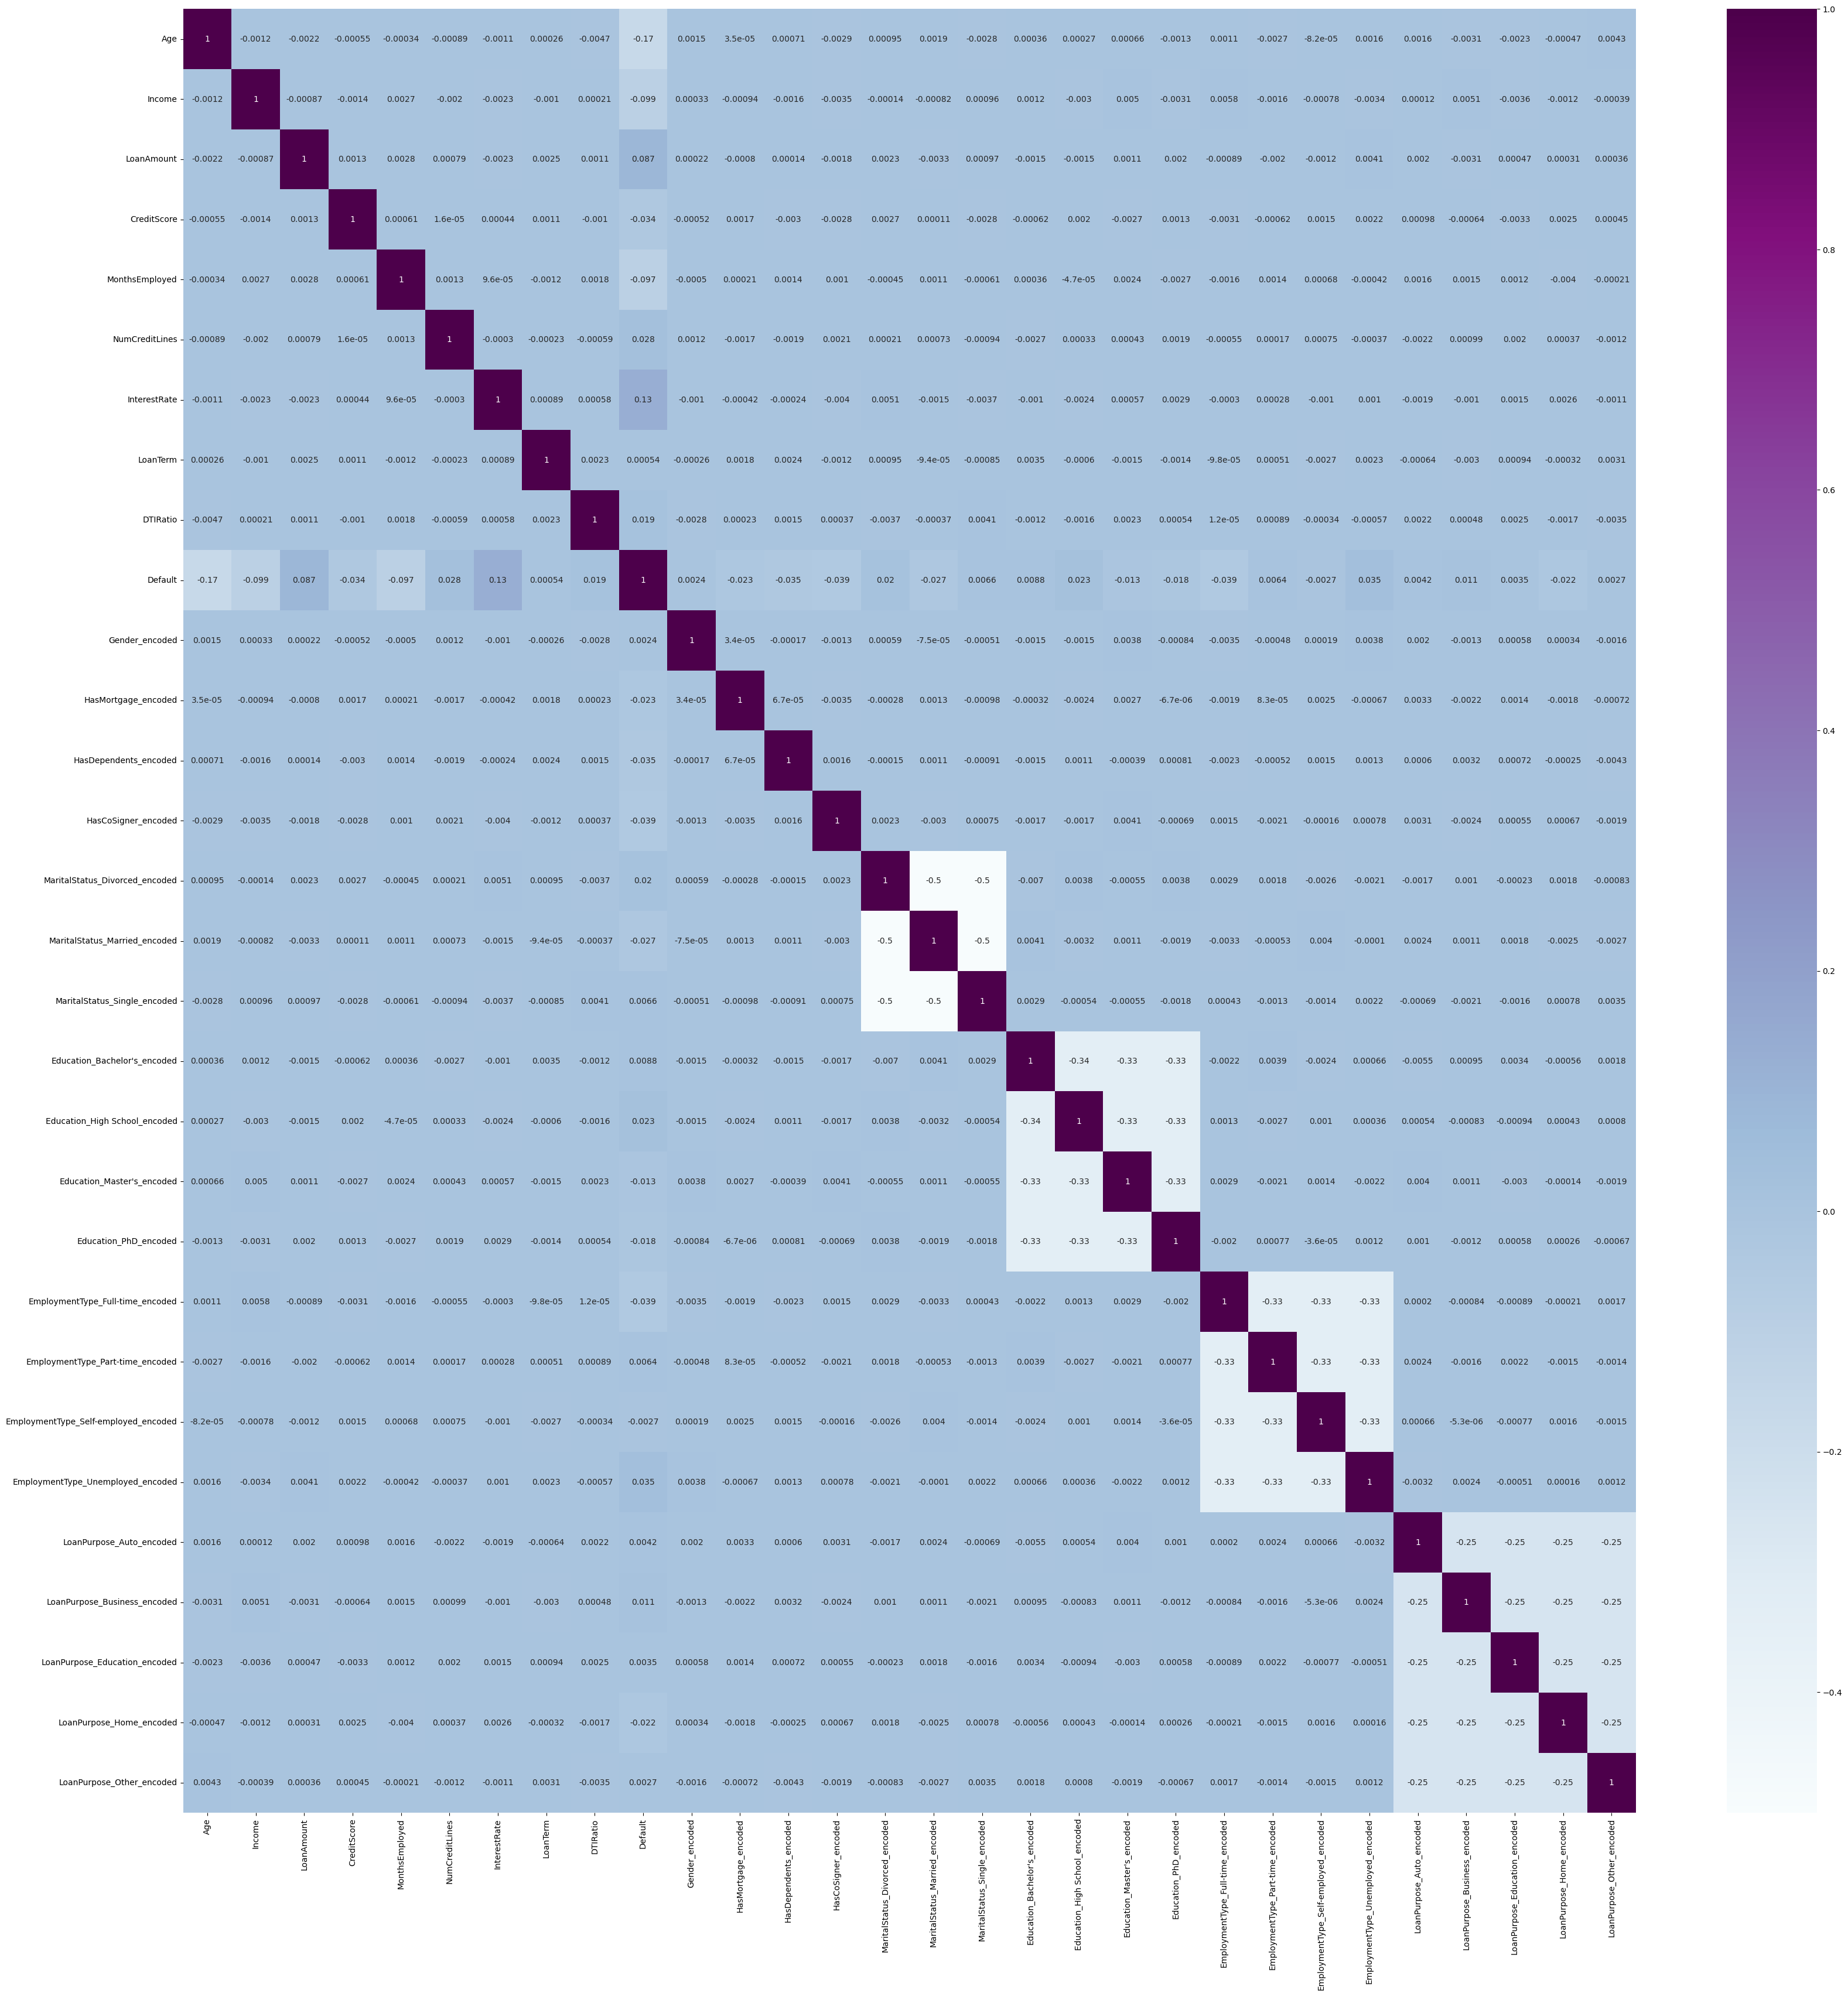

In [38]:
correlation = df.corr()
plt.figure(figsize=(40,40))
sns.heatmap(correlation,annot = True , cmap='BuPu')

In [39]:
correlation = df.corr()
correlation

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default,...,Education_PhD_encoded,EmploymentType_Full-time_encoded,EmploymentType_Part-time_encoded,EmploymentType_Self-employed_encoded,EmploymentType_Unemployed_encoded,LoanPurpose_Auto_encoded,LoanPurpose_Business_encoded,LoanPurpose_Education_encoded,LoanPurpose_Home_encoded,LoanPurpose_Other_encoded
Age,1.000000,-0.001244,-0.002213,-0.000548,-0.000341,-0.000890,-0.001127,0.000263,-0.004689,-0.167783,...,-0.001293,0.001127,-0.002659,-0.000082,0.001620,0.001604,-0.003104,-0.002300,-0.000474,0.004286
Income,-0.001244,1.000000,-0.000865,-0.001430,0.002675,-0.002016,-0.002303,-0.000998,0.000205,-0.099119,...,-0.003124,0.005783,-0.001635,-0.000778,-0.003362,0.000115,0.005124,-0.003610,-0.001250,-0.000388
LoanAmount,-0.002213,-0.000865,1.000000,0.001261,0.002817,0.000794,-0.002291,0.002538,0.001122,0.086659,...,0.001989,-0.000887,-0.002038,-0.001157,0.004083,0.001964,-0.003093,0.000472,0.000308,0.000358
CreditScore,-0.000548,-0.001430,0.001261,1.000000,0.000613,0.000016,0.000436,0.001130,-0.001039,-0.034166,...,0.001303,-0.003108,-0.000615,0.001508,0.002214,0.000978,-0.000638,-0.003306,0.002513,0.000451
MonthsEmployed,-0.000341,0.002675,0.002817,0.000613,1.000000,0.001267,0.000096,-0.001166,0.001765,-0.097374,...,-0.002695,-0.001622,0.001363,0.000678,-0.000421,0.001570,0.001518,0.001159,-0.004033,-0.000208
NumCreditLines,-0.000890,-0.002016,0.000794,0.000016,0.001267,1.000000,-0.000297,-0.000226,-0.000586,0.028330,...,0.001928,-0.000551,0.000170,0.000745,-0.000365,-0.002157,0.000988,0.002040,0.000366,-0.001244
InterestRate,-0.001127,-0.002303,-0.002291,0.000436,0.000096,-0.000297,1.000000,0.000892,0.000575,0.131273,...,0.002913,-0.000300,0.000283,-0.001022,0.001038,-0.001922,-0.001029,0.001493,0.002580,-0.001128
LoanTerm,0.000263,-0.000998,0.002538,0.001130,-0.001166,-0.000226,0.000892,1.000000,0.002273,0.000545,...,-0.001391,-0.000098,0.000514,-0.002749,0.002330,-0.000636,-0.003032,0.000942,-0.000316,0.003051
DTIRatio,-0.004689,0.000205,0.001122,-0.001039,0.001765,-0.000586,0.000575,0.002273,1.000000,0.019236,...,0.000539,0.000012,0.000894,-0.000336,-0.000572,0.002177,0.000481,0.002513,-0.001672,-0.003497
Default,-0.167783,-0.099119,0.086659,-0.034166,-0.097374,0.028330,0.131273,0.000545,0.019236,1.000000,...,-0.018447,-0.038662,0.006372,-0.002714,0.034957,0.004181,0.011162,0.003512,-0.021564,0.002737


In [40]:
x = df.drop(columns = ['Default'], axis =1)
y = df['Default']

In [41]:
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [42]:
x_train, x_test, y_train , y_test =train_test_split(x,y,test_size = 0.25,random_state = 42)

In [43]:
## logistic regression
model1 = LogisticRegression()
model1.fit(x_train,y_train)
y_pred_model1 = model1.predict(x_test)
accuracy= accuracy_score(y_test,y_pred_model1)
accuracy*100

88.43617337907483

In [44]:
## decision tree classifier
from sklearn.tree import plot_tree 
model2 =DecisionTreeClassifier()
model2.fit(x_train,y_train)
y_pred_model2 = model2.predict(x_test)
accuracy = accuracy_score(y_pred_model2,y_test)
print("Accuracy decidon tree model:",accuracy*100)

Accuracy decidon tree model: 80.28572771276846


In [45]:
## random forest
model3 =RandomForestClassifier()
model3.fit(x_train,y_train)
y_pred_model3 = model3.predict(x_test)
accuracy = accuracy_score(y_pred_model3,y_test)
print("Accuracy Random forest model:",accuracy*100)

Accuracy Random forest model: 88.5614925513417


In [46]:
##kneighbor model
model4 =KNeighborsClassifier(n_neighbors=3)
model4.fit(x_train,y_train)
y_pred_model4 = model4.predict(x_test)
accuracy = accuracy_score(y_pred_model4,y_test)
print("Accuracy Random forest model:",accuracy*100)

Accuracy Random forest model: 85.68698403747044


In [47]:
from sklearn.metrics import classification_report

def generate_classification_report(model_name, y_test, y_pred):
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for {model_name}:\n{report}\n")

generate_classification_report("Model1", y_test, y_pred_model1)  
generate_classification_report("Model2", y_test, y_pred_model2)
generate_classification_report("Model3", y_test, y_pred_model3)    
generate_classification_report("Model4", y_test, y_pred_model4)


Classification Report for Model1:
              precision    recall  f1-score   support

           0       0.88      1.00      0.94     56410
           1       0.66      0.01      0.03      7427

    accuracy                           0.88     63837
   macro avg       0.77      0.51      0.48     63837
weighted avg       0.86      0.88      0.83     63837


Classification Report for Model2:
              precision    recall  f1-score   support

           0       0.90      0.88      0.89     56410
           1       0.20      0.23      0.22      7427

    accuracy                           0.80     63837
   macro avg       0.55      0.56      0.55     63837
weighted avg       0.82      0.80      0.81     63837


Classification Report for Model3:
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     56410
           1       0.68      0.03      0.06      7427

    accuracy                           0.89     63837
   macro avg       0.78 

In [48]:
import pickle

In [49]:
with open('model.pkl', 'wb')as file:
    pickle.dump(model3, file)